https://github.com/lovit/textmining-tutorial/blob/master/topics/topic1_from_text_to_vector/ngram.pdf
    
https://mrseo.co.kr/n-gram-%EC%9D%B8%EB%8D%B1%EC%8A%A4-%EB%B0%A9%EC%8B%9D/  
  
http://jiisonline.evehost.co.kr/files/DLA/20180401181820_JIIS-2018-24(1)_9.pdf?PHPSESSID=e599a4de79e4b9f2c41a84793ae9f545  
  
https://datascienceschool.net/view-notebook/a0c848e1e2d343d685e6077c35c4203b/  
하기 내용은 상기 내용을 요약한것

## Unigram

* 독립된 하나의 단어를 unigram이라한다.

## Bigram  
* unigram + unigram
* 두개의 단어 조합을 하나의 단어로 취급한다.
* 단어의 연결은 '-'로 표기한다.
* bigram은 문맥의 표현력이 좋다.
 - '재미'라는 단어 만으로는 이 문장의 긍/부정을 알기 어렵다.  
 - '있는'만으로는 어떤 의미인지 알기 어렵다.
 - '재미-있는'은 긍정적인 문맥을 표현한다.  
  
* document classification은 bigram + linear model이면 충분하다.  
 - 많은 연구들에서도 sentiment/category classification에서는 bigram features이면 logistic regression과 같은 모델이어도 분류가 잘된다 알려졌다.
 - unigram 보다는 bigram을 이용하것이 큰 도움이 된다.  
   
## N-Gram 
* n-gram은 새 개 이상의 단어 조합을 하나의 단어로 취급한다. 
* 추출 방법은 다양하고 가장 좋은 방법은 아직 없다. 하지만 계산 과정에서 많은 메모리가 필요할 수 있다. 
* 가장 간단한 방법은 모든 n-gram에 대하여 빈도수를 계산하는 것이다.  
* 'Josa + Verb + Noun'과 같은 형태의 n-gram이 추출 될수도 있다.  

```python
[(('열린/Verb', '영화/Noun'), 476), 
 (('에서/Noun', '열린/Verb', '영화/Noun'),288),
 (('코미디/Noun','영화/Noun'),204),
 (('국제/Noun', '영화제/Noun'), 200),
 (('에서/Josa','열린/Verb','영화/Noun'), 185)]
```
 
 <마지막 단어가 '영화'인 bi/trigram>
 

```python
[(('재/Noun', '배포/Noun', '금지/Noun'), 20436),
 (('및/Noun', '열린/Verb', '영화/Noun'), 14687),
 (('전재/Noun', '및/Noun', '재/Noun'), 14340),
 (('무단/Noun', '전재/Noun', '및/Noun'), 14340),
 (('무단/Noun', '전재/Noun', '재/Noun'), 5178)
```

<뉴스기사의 빈도수 상위 5개의 trigram>

## Origin PMI  
**Bigram score**
$$PMI(A, B) = log( \frac{p(A \cap B)}{p(A)p(B)}) = log(\frac{nz}{ab})$$
> $p(A)$와 $p(B)$는 A와 B가 등장할 확률이고, $p(A\cap B)$는 A와 B가 동시에 등장할 확률이다.   
전체 문헌의 토큰 개수를 n이라고 하고,   
A가 등장할 횟수를 a,  
B가 등장할 횟수를 b,  
A와 B가 동시에 등장할 횟수를 z이라고 한다.  
  
  

**N-Gram score**
$$PMI(A, B, C) = log( \frac{p(A \cap B \cap C)}{p(A)p(B)p(C)}) = log(\frac{n^2z}{abc})$$

---

In [9]:
testset_1 = """동해물과 백두산이 마르고 닳도록 
하느님이 보우하사 우리나라 만세.  
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. 

남산[11] 위에 저 소나무, 철갑을 두른 듯  
바람서리[12] 불변함은 우리 기상일세. 
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. 

가을 하늘 공활한데 높고 구름 없이  
밝은 달은 우리 가슴 일편단심일세. 
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. 

이 기상과 이 맘으로 충성을 다하여 
괴로우나 즐거우나 나라 사랑하세. 
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. """

In [10]:
import re
import collections
from konlpy.tag import Twitter; tw = Twitter()
# s = '1234 안녕하세요'

hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')
result = hangul.sub("", testset_1)
# print(result)

song = tw.morphs(result)

nouns_count = collections.Counter(song)
denominator = collections.Counter(song)
print("gram에 적용할 문장 : ", song[18:25])
print("전체 단어 길이 : ", len(song))

gram에 적용할 문장 :  ['대한', '사람', '대한', '으로', '길이', '보전', '하세']
전체 단어 길이 :  109


## Bigram 점수
by Point Mutual Information (PMI) - like
* Mikolov의 PMI

$$
score(w_i, w_j) = \frac{count(w_i, w_j)-\delta}{count(w_i) \times count(w_j)}
$$

In [11]:
# print(song[18], nouns_count[song[18]])
# print(song[19], nouns_count[song[19]])
# nouns_count[song[19]] * nouns_count[song[20]]

# 코드 n-gram은 순차로 만들지 말고 순서에 상관 없이 생성해야 한다.

In [12]:
gram_dict = {}
for i in range(len(song)):
    if i != len(song)-1:
        gram_dict[song[i], song[i+1]] = 0

for i in range(len(song)):
    if i != len(song)-1:
        gram_dict[song[i], song[i+1]] += 1
bigram_point = {}
for i in range(len(song)):
    if i != len(song)-1:
#         print(song[i], song[i+1], ":" ,song[i], song[i+1])
        bigram_point[song[i], song[i+1]] = gram_dict[song[i], song[i+1]] / (nouns_count[song[i]] * nouns_count[song[i+1]])
# gram_dict
# print(song[16], song[17],":" ,gram_dict[song[16], song[17]] / (nouns_count[song[16]] * nouns_count[song[17]]))
# print(song[17], song[18],":" ,gram_dict[song[17], song[18]] / (nouns_count[song[17]] * nouns_count[song[18]]))
# print(song[18], song[19],":" ,gram_dict[song[18], song[19]] / (nouns_count[song[18]] * nouns_count[song[19]]))
# print(song[19], song[20],":" ,gram_dict[song[19], song[20]] / (nouns_count[song[19]] * nouns_count[song[20]]))
bigram_point

{('가슴', '일편단심'): 1.0,
 ('가을', '하늘'): 1.0,
 ('강산', '대한'): 0.125,
 ('공활', '한'): 1.0,
 ('과', '백두산'): 0.5,
 ('과', '이'): 0.125,
 ('괴로', '우'): 0.5,
 ('구름', '없이'): 1.0,
 ('기상', '과'): 0.25,
 ('기상', '일'): 0.25,
 ('길이', '보전'): 0.25,
 ('나', '나라'): 0.5,
 ('나', '즐거'): 0.5,
 ('나라', '사랑하세'): 1.0,
 ('남산', '위'): 1.0,
 ('높고', '구름'): 1.0,
 ('다하여', '괴로'): 1.0,
 ('달', '은'): 0.5,
 ('닳', '도록'): 1.0,
 ('대한', '사람'): 0.125,
 ('대한', '으로'): 0.1,
 ('데', '높고'): 1.0,
 ('도록', '하느님'): 1.0,
 ('동해', '물'): 1.0,
 ('두른', '듯'): 1.0,
 ('듯', '바람'): 1.0,
 ('마르고', '닳'): 1.0,
 ('만세', '무궁화'): 0.25,
 ('맘', '으로'): 0.2,
 ('무궁화', '삼천리'): 0.25,
 ('물', '과'): 0.5,
 ('바람', '서리'): 1.0,
 ('밝은', '달'): 1.0,
 ('백두산', '이'): 0.25,
 ('보우', '하사'): 1.0,
 ('보전', '하세'): 0.25,
 ('불변', '함'): 1.0,
 ('사람', '대한'): 0.125,
 ('사랑하세', '무궁화'): 0.25,
 ('삼천리', '화려'): 0.25,
 ('서리', '불변'): 1.0,
 ('세', '무궁화'): 0.25,
 ('소나무', '철갑'): 1.0,
 ('없이', '밝은'): 1.0,
 ('에', '저'): 1.0,
 ('우', '나'): 0.5,
 ('우리', '가슴'): 0.5,
 ('우리', '기상'): 0.25,
 ('우리나라', '만세'): 1.0,
 ('위', '에'

In [13]:
gram_dict[song[16], song[17]]

4

In [14]:
nouns_count[song[16]] * nouns_count[song[17]]

16

In [15]:
4/16

0.25

In [16]:
import ngram

In [17]:
G = ngram.NGram(song)
print(G.search('동해물과백두산이'))
print(G.search('동해물 과 백두산 이'))

[('동해', 0.16666666666666666), ('이', 0.08333333333333333), ('없이', 0.07692307692307693), ('길이', 0.07692307692307693), ('백두산', 0.07142857142857142)]
[('동해', 0.13333333333333333), ('이', 0.06666666666666667), ('없이', 0.0625), ('길이', 0.0625), ('백두산', 0.058823529411764705)]


## N-Gram 점수
Extending Point Mutual Information(PMI)
* PMI는 2개의 items에 대해 정의되어 있다.
* n 개의 items에 대한 확장방법은 다양하며, 절대적인 정답은 없다.
* bigram이 더 정확한 문맥을 나타내므로, 이를 이용하여 PMI를 확장한다.  

$$score(w_i, w_j, w_k) = \frac{count(w_i, w_j, w_k)-\delta}{count(w_i, w_j) \times count(w_j, w_k)}$$

## N-gram 사용범위

* 한국어에서 최소한의 의미를 지니는 품사정보를 이용해야 좋다.  
* "있는 - 영화"는 유의미한 n-gram이 아니다.  
* 첫 단어가 명사이거나, 조사/어미가 아닌 n-gram을 선택 할 수 있다.
* "재미 - 있는"  
  
ex)    
tokenize('라라랜드는 재미있는 영화입니다')  
```라라랜드, 는, 재미, 있는, 영화, 입니다```

---
* 의미있는 N-gram을 추출하기 위해서 templates을 이용해도 좋다.
  - (명사, 조사)/(명사, 명사)처럼 미리 정의한 templates에 품사가 매칭되는 n-grams을 추출 할 수 있다.  

ex)  
tokenize("라라랜드는 재미잇는 영화입니다")  
```라라랜드/명사, 는/조사, 재미/명사, 있는/형용사, 영화/명사, 입니다/형용사```

---
* 조사/어미를 skip하는 templates도 유용하다.
  - (명사, [조사], 명사)를 이용하면 아래 두문장에서 모두 "라라랜드 - 개봉"을 추출할 수 있다.
  
ex)  
tokenize('라라랜드가 개봉 했습니다.')  
```**라라랜드/명사**, 가/조사, **개봉/명사**, 했습니다/동사```  
  
tokenize('진짜? 라라랜드 개봉 했어?')  
```진짜/부사, ?/기호, **라라랜드/명사**, **개봉/명사**, 했어/동사, ?/기호```

## N-Gram의 단점
* 검색 노이즈가 크다
* 데이터베이스 용량이 커진다

In [18]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [19]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

testset_1 = """동해물과 백두산이 마르고 닳도록 
하느님이 보우하사 우리나라 만세.  
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. 

남산[11] 위에 저 소나무, 철갑을 두른 듯  
바람서리[12] 불변함은 우리 기상일세. 
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. 

가을 하늘 공활한데 높고 구름 없이  
밝은 달은 우리 가슴 일편단심일세. 
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. 

이 기상과 이 맘으로 충성을 다하여 
괴로우나 즐거우나 나라 사랑하세. 
무궁화 삼천리 화려강산 
대한 사람, 대한으로 길이 보전하세. """

# hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')
# result = hangul.sub("", testset_1)

song = tw.morphs(testset_1)

bigram = bigrams(song)
trigram = ngrams(song, 3)

In [20]:
for t in bigram:
    print(t)

('동해', '물')
('물', '과')
('과', '백두산')
('백두산', '이')
('이', '마르고')
('마르고', '닳')
('닳', '도록')
('도록', '하느님')
('하느님', '이')
('이', '보우')
('보우', '하사')
('하사', '우리나라')
('우리나라', '만세')
('만세', '.')
('.', '무궁화')
('무궁화', '삼천리')
('삼천리', '화려')
('화려', '강산')
('강산', '대한')
('대한', '사람')
('사람', ',')
(',', '대한')
('대한', '으로')
('으로', '길이')
('길이', '보전')
('보전', '하세')
('하세', '.')
('.', '남산')
('남산', '[')
('[', '11')
('11', ']')
(']', '위')
('위', '에')
('에', '저')
('저', '소나무')
('소나무', ',')
(',', '철갑')
('철갑', '을')
('을', '두른')
('두른', '듯')
('듯', '바람')
('바람', '서리')
('서리', '[')
('[', '12')
('12', ']')
(']', '불변')
('불변', '함')
('함', '은')
('은', '우리')
('우리', '기상')
('기상', '일')
('일', '세')
('세', '.')
('.', '무궁화')
('무궁화', '삼천리')
('삼천리', '화려')
('화려', '강산')
('강산', '대한')
('대한', '사람')
('사람', ',')
(',', '대한')
('대한', '으로')
('으로', '길이')
('길이', '보전')
('보전', '하세')
('하세', '.')
('.', '가을')
('가을', '하늘')
('하늘', '공활')
('공활', '한')
('한', '데')
('데', '높고')
('높고', '구름')
('구름', '없이')
('없이', '밝은')
('밝은', '달')
('달', '은')
('은', '우리')
('우리', '가슴')
('가슴', '일편단

In [21]:
for t in trigram:
    print(t)

('동해', '물', '과')
('물', '과', '백두산')
('과', '백두산', '이')
('백두산', '이', '마르고')
('이', '마르고', '닳')
('마르고', '닳', '도록')
('닳', '도록', '하느님')
('도록', '하느님', '이')
('하느님', '이', '보우')
('이', '보우', '하사')
('보우', '하사', '우리나라')
('하사', '우리나라', '만세')
('우리나라', '만세', '.')
('만세', '.', '무궁화')
('.', '무궁화', '삼천리')
('무궁화', '삼천리', '화려')
('삼천리', '화려', '강산')
('화려', '강산', '대한')
('강산', '대한', '사람')
('대한', '사람', ',')
('사람', ',', '대한')
(',', '대한', '으로')
('대한', '으로', '길이')
('으로', '길이', '보전')
('길이', '보전', '하세')
('보전', '하세', '.')
('하세', '.', '남산')
('.', '남산', '[')
('남산', '[', '11')
('[', '11', ']')
('11', ']', '위')
(']', '위', '에')
('위', '에', '저')
('에', '저', '소나무')
('저', '소나무', ',')
('소나무', ',', '철갑')
(',', '철갑', '을')
('철갑', '을', '두른')
('을', '두른', '듯')
('두른', '듯', '바람')
('듯', '바람', '서리')
('바람', '서리', '[')
('서리', '[', '12')
('[', '12', ']')
('12', ']', '불변')
(']', '불변', '함')
('불변', '함', '은')
('함', '은', '우리')
('은', '우리', '기상')
('우리', '기상', '일')
('기상', '일', '세')
('일', '세', '.')
('세', '.', '무궁화')
('.', '무궁화', '삼천리')
('무궁화', '삼천리', 

In [29]:
from nltk import ConditionalFreqDist

bigram = ngrams(song, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])

In [30]:
cfd.conditions()

['화려',
 '무궁화',
 '이',
 '길이',
 '12',
 '을',
 '즐거',
 ']',
 '저',
 '함',
 '만세',
 '맘',
 '우리나라',
 ',',
 '도록',
 '밝은',
 '과',
 '하세',
 '괴로',
 '우',
 '백두산',
 '높고',
 '물',
 '구름',
 '보우',
 '공활',
 '사랑하세',
 '에',
 '.',
 '동해',
 'SS',
 '사람',
 '으로',
 '소나무',
 '가을',
 '서리',
 '두른',
 '바람',
 '하사',
 '11',
 '세',
 '우리',
 '가슴',
 '한',
 '듯',
 '일',
 '삼천리',
 '닳',
 '보전',
 '대한',
 '나',
 '다하여',
 '일편단심',
 '하느님',
 '위',
 '달',
 '강산',
 '데',
 '불변',
 '하늘',
 '철갑',
 '충성',
 '[',
 '없이',
 '마르고',
 '은',
 '나라',
 '기상',
 '남산']

다음은 nltk 패키지의 샘플 코퍼스인 movie_reviews의 텍스트로부터 바이그램 확률을 추정하는 예제이다.

In [66]:
# import nltk
# # nltk.download('movie_reviews')
# # nltk.download('punkt')
# # from nltk.corpus import movie_reviews

# sentences = []
# for tokens in movie_reviews.sents():
#     bigram = ngrams(song, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
#     sentences += [t for t in bigram]

# sentences[:20]

문장의 처음(SS 문맥), i라는 단어 다음, 마침표 다음에 나오는 단어의 빈도는 다음과 같다.

In [26]:
cfd = ConditionalFreqDist(sentences)

우리나라 다음에 올 수 있는 단어들

In [31]:
cfd["이"].most_common(5)

[('맘', 1), ('기상', 1), ('보우', 1), ('마르고', 1)]

사람 다음에 올 수 있는 단어들

In [32]:
cfd["."].most_common(5)

[('무궁화', 4), ('이', 1), ('SE', 1), ('가을', 1), ('남산', 1)]

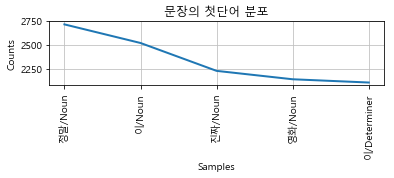

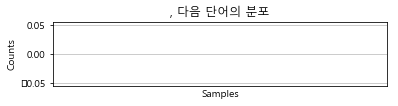

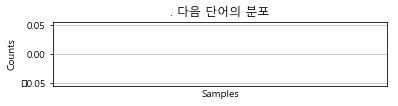

In [65]:
import matplotlib.pyplot as plt
plt.subplot(311)
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.subplot(312)
cfd[","].plot(5, title=", 다음 단어의 분포")
plt.subplot(313)
cfd["."].plot(5, title=". 다음 단어의 분포")

In [36]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

빈도를 추정하면 각각의 조건부 확률은 기본적으로 다음과 같이 추정할 수 있다.
$$
P(w|wc)=\frac{C((wc,w))}{C((wc))}
$$ 
위 식에서  $C(w_c,w)$ 은 전체 말뭉치에서  $(w_c,w)$ 라는 바이그램이 나타나는 횟수이고  $C(w_c)$ 은 전체 말뭉치에서  $(w_c)$ 라는 유니그램(단어)이 나타나는 횟수이다.

NLTK의 ConditionalProbDist 클래스에 MLEProbDist 클래스 팩토리를 인수로 넣어 위와 같이 빈도를 추정할 수 있다.

In [37]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

트레이닝이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

In [38]:
cpd["."].prob("동")

0.0

In [39]:
cpd["."].prob("무궁화")

0.5

In [40]:
cpd["."].prob("가을")

0.125

## 바이그램 언어 모형 
조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다.

다음으로 이 토큰열을 N-그램형태로 분해한다. 바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타난다.

P(SS I am a boy SE)=P(I|SS)⋅P(am|I)⋅P(a|am)⋅P(boy|a)⋅P(.|boy)⋅P(SE|.)
 
우선 다음과 같이 문장(단어 리스트)의 리스트를 만든다.

In [41]:
import numpy as np

def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [42]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.4308653429145333e-63

In [43]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

2.4308653429145333e-63

이 모형을 기반으로 임의의 랜덤한 문장을 생성할 수 있다.

In [48]:
# def generate_sentence(seed=None):
#     if seed is not None:
#         import random
#         random.seed(seed)
#     c = "SS"
#     sentence = []
#     while True:
#         if c not in cpd:
#             break
#         w = cpd[c].generate()

#         if w == "SE":
#             break
#         elif w in ["i", "ii", "iii"]:
#             w2 = w.upper()
#         elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
#             w2 = w.title()
#         else:
#             w2 = w

#         if c == "SS":
#             sentence.append(w2.title())
#         elif c in ["`", "\"", "'", "("]:
#             sentence.append(w2)
#         elif w in ["'", ".", ",", ")", ":", ";", "?"]:
#             sentence.append(w2)
#         else:
#             sentence.append(" " + w2)

#         c = w
#     return "".join(sentence)

In [49]:
with open('ratings_train.txt', 'r', encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외
len(data)

150000

In [50]:
reviews = [i[1] for i in data] # 댓글만 뽑는다.
len(reviews)

150000

In [51]:
from konlpy.tag import Twitter; tw = Twitter()
# review = tw.morphs(movie_review)

In [52]:
def tokenize(doc):
    tokens = ['/'.join(t) for t in tw.pos(doc)]
    return tokens

In [53]:
from tqdm import tqdm
import nltk
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

In [55]:
sentences = []
for d in tqdm(reviews):
    tokens = tokenize(d)
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

100%|██████████| 150000/150000 [02:39<00:00, 942.25it/s]


In [56]:
sentences[:30]

[('SS', '아/Exclamation'),
 ('아/Exclamation', '더빙/Noun'),
 ('더빙/Noun', '../Punctuation'),
 ('../Punctuation', '진짜/Noun'),
 ('진짜/Noun', '짜증/Noun'),
 ('짜증/Noun', '나네/Verb'),
 ('나네/Verb', '요/Eomi'),
 ('요/Eomi', '목소리/Noun'),
 ('목소리/Noun', 'SE'),
 ('SS', '흠/Noun'),
 ('흠/Noun', '.../Punctuation'),
 ('.../Punctuation', '포스터/Noun'),
 ('포스터/Noun', '보고/Noun'),
 ('보고/Noun', '초딩/Noun'),
 ('초딩/Noun', '영화/Noun'),
 ('영화/Noun', '줄/Noun'),
 ('줄/Noun', '..../Punctuation'),
 ('..../Punctuation', '오버/Noun'),
 ('오버/Noun', '연기/Noun'),
 ('연기/Noun', '조차/Josa'),
 ('조차/Josa', '가볍/Adjective'),
 ('가볍/Adjective', '지/Eomi'),
 ('지/Eomi', '않구/Verb'),
 ('않구/Verb', '나/Eomi'),
 ('나/Eomi', 'SE'),
 ('SS', '너무/Noun'),
 ('너무/Noun', '재/Noun'),
 ('재/Noun', '밓었/Noun'),
 ('밓었/Noun', '다/Josa'),
 ('다/Josa', '그래서/Adverb')]

In [57]:
cfd = ConditionalFreqDist(sentences)
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [58]:
def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

In [59]:
korean_most_common("나", 10)

[('는/Josa', 1006),
 ('의/Josa', 338),
 ('만/Josa', 213),
 ('에게/Josa', 148),
 ('에겐/Josa', 84),
 ('랑/Josa', 81),
 ('한테/Josa', 50),
 ('이/Determiner', 44),
 ('참/Verb', 44),
 ('와도/Josa', 42)]

In [60]:
korean_most_common("의", 10)

[('영화/Noun', 19),
 ('연기/Noun', 17),
 ('구심/Noun', 12),
 ('모습/Noun', 9),
 ('감독/Noun', 8),
 ('그/Noun', 7),
 ('감동/Noun', 7),
 ('흐름/Noun', 6),
 ('매력/Noun', 6),
 ('이야기/Noun', 6)]

In [61]:
def korean_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    return cpd[context].prob(word)

In [62]:
korean_bigram_prob("이", "영화")

0.379334665569531

In [63]:
korean_bigram_prob("영화", "이")

0.00023398654577361802

In [64]:
def korean_generate_sentence(seed=None, debug=False):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
            
        w = cpd[c].generate()

        if w == "SE":
            break

        w2 = w.split("/")[0]
        pos = w.split("/")[1]

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w2 in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ["Josa", "Punctuation", "Suffix"]:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                   "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
        c = w

        if debug:
            print(w)

    return "".join(sentence)

모형을 기반으로 임의의 랜덤한 문장을 생성할 수 있다.

In [67]:
korean_generate_sentence(0)

'리미라는 사회적한 결말이 너무 준영화 ㅎㅎ'

In [68]:
korean_generate_sentence(1)

'굳 굳 굳~ 이 딴 놈들은 별로다.'

In [69]:
korean_generate_sentence(2)

'딴 엔... 지루했 으나 많이 되셨네요,^-^'

In [70]:
korean_generate_sentence(3)

'ㅋ'

In [71]:
korean_generate_sentence(5)

'미국의 답답한 마음이 작에 남는 건 여주 인공은 왜일케 낮지?'